In [37]:
from timeit import default_timer as timer
from graph import Graph

time_list = []
weight_list = []
n_list = [16, 32, 64, 128, 200, 250, 300, 350, 400, 450, 500, 512, 1024]
times_list = [200]


time_len = len(times_list)
n_len = len(n_list)
 
# for k in range(len(times_list)):


for k in range(len(times_list)):
    for j in range(len(n_list)):
        weights = 0
        g = Graph(n_list[j])
        begin = timer()
        for i in range(times_list[k]):
            # print(i)
            weights += g.prim()
            g.regenerate()
        answer = weights/times_list[k]
        end = timer()
        print(answer)
        weight_list.append((n_list[j], answer, times_list[k]))
        time_list.append((n_list[j], (end-begin)/times_list[k],times_list[k]))

print(weight_list)
print(time_list)

1.1571695767568309
1.159996145766255
1.2083722104710004
1.189498171569822
1.2069082998455996
1.202484173359799
1.2059150294866496
1.2003890995309399
1.2024152437418205
1.1974981465476697
1.2082779368282228
1.2010748856914146
1.2006294151041772
[(16, 1.1571695767568309, 200), (32, 1.159996145766255, 200), (64, 1.2083722104710004, 200), (128, 1.189498171569822, 200), (200, 1.2069082998455996, 200), (250, 1.202484173359799, 200), (300, 1.2059150294866496, 200), (350, 1.2003890995309399, 200), (400, 1.2024152437418205, 200), (450, 1.1974981465476697, 200), (500, 1.2082779368282228, 200), (512, 1.2010748856914146, 200), (1024, 1.2006294151041772, 200)]
[(16, 0.0007465265000064392, 200), (32, 0.0022622799999953715, 200), (64, 0.009734692499914672, 200), (128, 0.039799311499955366, 200), (200, 0.0967863275000127, 200), (250, 0.14788213899999392, 200), (300, 0.20793177399988053, 200), (350, 0.2862794175000454, 200), (400, 0.3714382415, 200), (450, 0.4761761084999307, 200), (500, 0.574792282499

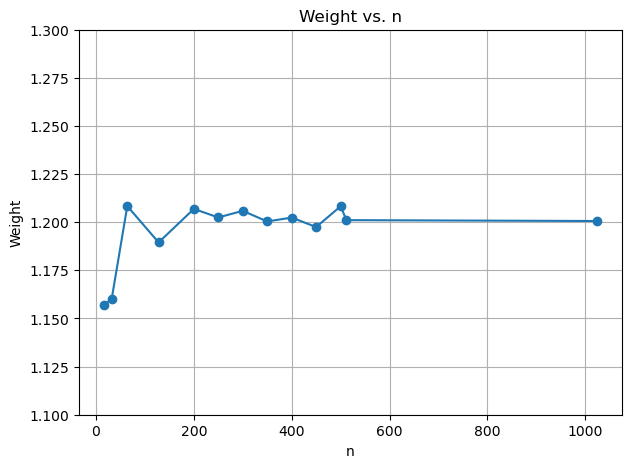

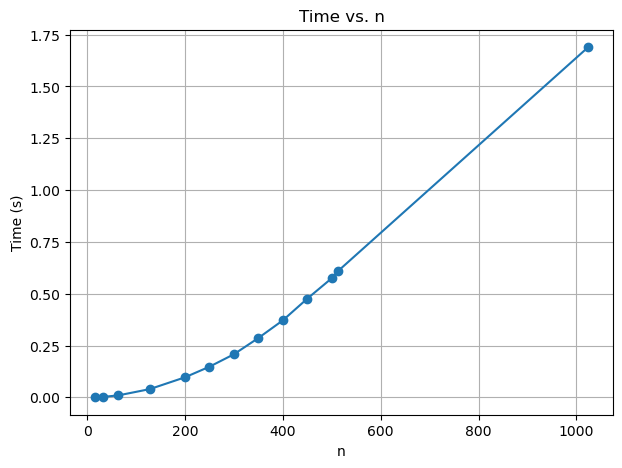

In [38]:
import matplotlib.pyplot as plt

# 画出weight随着n的变化图像
plt.figure(figsize=(7, 5))
plt.plot([item[0] for item in weight_list], [item[1] for item in weight_list], marker='o', linestyle='-')
plt.title('Weight vs. n')
plt.xlabel('n')
plt.ylabel('Weight')
plt.grid(True)
plt.ylim(1.1,1.3)
plt.show()

# 画出time随着n的变化图像
plt.figure(figsize=(7, 5))
plt.plot([item[0] for item in time_list], [item[1] for item in time_list], marker='o', linestyle='-')
plt.title('Time vs. n')
plt.xlabel('n')
plt.ylabel('Time (s)')
plt.grid(True)
plt.show()


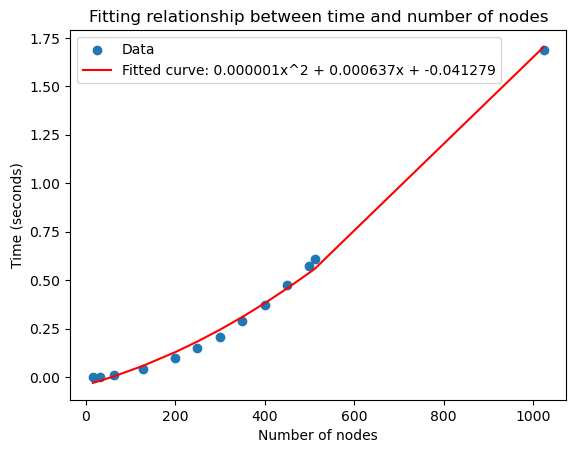

Fitted parameters (a, b, c): [ 1.04162856e-06  6.37269559e-04 -4.12794353e-02]


: 

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from timeit import default_timer as timer

# 这里的 graph 应该是你自己定义的图结构，你可以替换为你的实现
from graph import Graph

def fit_time_vs_nodes(time_list):
    n_list = [data[0] for data in time_list]
    y_data = np.array([data[1] for data in time_list])

    # 将列表转换为 NumPy 数组以便进行数学运算
    x_data = np.array(n_list)

    # 定义拟合函数的形式，这里我们选择二次多项式
    def func(x, a, b, c):
        return a * x**2 + b * x + c

    # 使用 curve_fit 函数进行曲线拟合
    popt, pcov = curve_fit(func, x_data, y_data)

    # 绘制数据点
    plt.scatter(x_data, y_data, label='Data')

    # 绘制拟合曲线
    plt.plot(x_data, func(x_data, *popt), 'r-', label='Fitted curve: {:.6f}x^2 + {:6f}x + {:.6f}'.format(*popt))

    plt.xlabel('Number of nodes')
    plt.ylabel('Time (seconds)')
    plt.title('Fitting relationship between time and number of nodes')
    plt.legend()
    plt.show()

    print("Fitted parameters (a, b, c):", popt)

# 执行拟合
fit_time_vs_nodes(time_list)
